# Accidents in France from 2005 to 2016
The goal of this analysis is to determine the condition of lightings at the scene of accidents in france between 2005 to 2016

In [1]:
#reading the files using pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
xtics_file = pd.read_csv("./france/caracteristics.csv", encoding="latin1", low_memory=False)
holiday_file = pd.read_csv("./france/holidays.csv", encoding="latin1", low_memory=False)
place_file = pd.read_csv("./france/places.csv", encoding="latin1", low_memory=False)
user_file = pd.read_csv("./france/users.csv", encoding="latin1", low_memory=False)
vehicle_file = pd.read_csv("./france/vehicles.csv", encoding="latin1", low_memory=False)

In [2]:
xtics_file.head(10)

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0,590
5,201600000006,16,12,23,1115,1,2,1,7.0,6.0,11.0,Rue Jean-baptiste LEBAS,M,0.0,0,590
6,201600000007,16,5,1,1145,1,2,1,7.0,2.0,51.0,rue Jules FERRY,M,0.0,0,590
7,201600000008,16,5,14,1915,2,1,1,1.0,1.0,250.0,NaN,M,0.0,0,590
8,201600000009,16,9,23,1900,1,2,1,1.0,3.0,51.0,rn41,M,0.0,0,590
9,201600000010,16,12,30,1030,1,1,1,9.0,6.0,303.0,NaN,M,0.0,0,590


In [5]:
place_file.head(10)

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201600000001,3.0,39,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
1,201600000002,3.0,39,NaN,NaN,1.0,0.0,NaN,NaN,0.0,1.0,2.0,0.0,58.0,1.0,0.0,1.0,0.0
2,201600000003,3.0,1,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,3.0,0.0,68.0,2.0,0.0,3.0,99.0
3,201600000004,4.0,0,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
4,201600000005,4.0,0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0
5,201600000006,3.0,41,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
6,201600000007,3.0,1,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,1.0,70.0,0.0,1.0,0.0,1.0,99.0
7,201600000008,3.0,2,NaN,D,2.0,2.0,NaN,NaN,0.0,1.0,1.0,0.0,70.0,1.0,0.0,1.0,0.0
8,201600000009,4.0,0,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,99.0
9,201600000010,4.0,0,NaN,A,2.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,44.0,7.0,0.0,1.0,0.0


In [3]:
user_file.head(10)

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01
5,201600000003,1.0,1,1,1,1.0,11.0,0.0,0.0,0.0,1997.0,A01
6,201600000003,NaN,3,3,1,5.0,NaN,6.0,2.0,1.0,1970.0,A01
7,201600000004,1.0,1,3,1,5.0,23.0,0.0,0.0,0.0,1999.0,B02
8,201600000004,2.0,2,4,1,0.0,23.0,0.0,0.0,0.0,1999.0,B02
9,201600000004,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1985.0,A01


In [4]:
vehicle_file.head(10)

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh
0,201600000001,0.0,7,0,0.0,0.0,1.0,1.0,B02
1,201600000001,0.0,2,0,0.0,0.0,7.0,15.0,A01
2,201600000002,0.0,7,0,6.0,0.0,1.0,1.0,A01
3,201600000003,0.0,7,0,0.0,1.0,6.0,1.0,A01
4,201600000004,0.0,32,0,0.0,0.0,1.0,1.0,B02
5,201600000004,0.0,7,0,0.0,0.0,8.0,15.0,A01
6,201600000005,0.0,30,0,0.0,2.0,1.0,15.0,B02
7,201600000005,0.0,7,0,0.0,2.0,3.0,1.0,A01
8,201600000006,0.0,7,0,0.0,1.0,1.0,1.0,A01
9,201600000007,1.0,30,0,0.0,0.0,3.0,15.0,A01


In [7]:
#explore missing values and drop columns that are not important to the analysis
xtics = xtics_file.isnull().sum()
xtics

Num_Acc         0
an              0
mois            0
jour            0
hrmn            0
lum             0
agg             0
int             0
atm            55
col            11
com             2
adr        140542
gps        473759
lat        477514
long       477518
dep             0
dtype: int64

In [8]:
#calculate the the percentage of missing values, create a data frame for easy comparison
xtics_per = xtics * 100 / xtics_file.shape[0]
xtics_per

Num_Acc     0.000000
an          0.000000
mois        0.000000
jour        0.000000
hrmn        0.000000
lum         0.000000
agg         0.000000
int         0.000000
atm         0.006548
col         0.001310
com         0.000238
adr        16.731489
gps        56.400888
lat        56.847920
long       56.848396
dep         0.000000
dtype: float64

In [10]:
xtics_compared = pd.DataFrame({"characteristics": xtics, "percentage": xtics_per}).T
xtics_compared

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
characteristics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.000000,11.00000,2.000000,140542.000000,473759.000000,477514.00000,477518.000000,0.0
percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006548,0.00131,0.000238,16.731489,56.400888,56.84792,56.848396,0.0


the adr, gps, lat and long columns where we have higher percentage of missing values are not important in our analysis and can be dropped

In [11]:
xtics_drop = ["adr", "gps", "lat", "long"]

In [12]:
xtics_file = xtics_file.drop(xtics_drop, axis=1)
xtics_file

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,590
...,...,...,...,...,...,...,...,...,...,...,...,...
839980,200500087950,5,12,21,2035,5,2,2,1.0,3.0,416.0,974
839981,200500087951,5,12,23,1010,1,2,1,1.0,3.0,416.0,974
839982,200500087952,5,12,26,1715,1,2,2,1.0,3.0,416.0,974
839983,200500087953,5,12,27,1500,1,2,3,2.0,5.0,416.0,974


In [13]:
place = place_file.isnull().sum()
place

Num_Acc         0
catr            1
voie        59071
v1         507169
v2         806032
circ          798
nbv          1790
pr         425215
pr1        426522
vosp         1640
prof         1061
plan         1076
lartpc       9545
larrout      8279
surf         1017
infra        1278
situ         1002
env1         1276
dtype: int64

In [14]:
place_per = place * 100 / place_file.shape[0]
place_per

Num_Acc     0.000000
catr        0.000119
voie        7.032387
v1         60.378340
v2         95.957904
circ        0.095002
nbv         0.213099
pr         50.621737
pr1        50.777335
vosp        0.195242
prof        0.126312
plan        0.128098
lartpc      1.136330
larrout     0.985613
surf        0.121074
infra       0.152146
situ        0.119288
env1        0.151907
dtype: float64

In [15]:
place_compared = pd.DataFrame({"place": place, "percentage": place_per}).T
place_compared

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
place,0.0,1.000000,59071.000000,507169.00000,806032.000000,798.000000,1790.000000,425215.000000,426522.000000,1640.000000,1061.000000,1076.000000,9545.00000,8279.000000,1017.000000,1278.000000,1002.000000,1276.000000
percentage,0.0,0.000119,7.032387,60.37834,95.957904,0.095002,0.213099,50.621737,50.777335,0.195242,0.126312,0.128098,1.13633,0.985613,0.121074,0.152146,0.119288,0.151907


In [16]:
place_drop = ["voie", "v1", "v2", "pr", "pr1"]

In [17]:
place_file = place_file.drop(place_drop, axis=1)
place_file

,Num_Acc,catr,circ,nbv,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201600000001,3.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
1,201600000002,3.0,1.0,0.0,0.0,1.0,2.0,0.0,58.0,1.0,0.0,1.0,0.0
2,201600000003,3.0,2.0,2.0,0.0,1.0,3.0,0.0,68.0,2.0,0.0,3.0,99.0
3,201600000004,4.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
4,201600000005,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839980,200500087950,4.0,2.0,3.0,0.0,1.0,1.0,0.0,80.0,1.0,0.0,1.0,3.0
839981,200500087951,4.0,2.0,2.0,0.0,1.0,2.0,0.0,70.0,1.0,0.0,1.0,0.0
839982,200500087952,4.0,1.0,2.0,0.0,1.0,1.0,0.0,75.0,1.0,0.0,1.0,3.0
839983,200500087953,4.0,2.0,0.0,0.0,1.0,1.0,0.0,150.0,1.0,0.0,1.0,0.0


In [18]:
user = user_file.isnull().sum()
user

Num_Acc         0
place      100366
catu            0
grav            0
sexe            0
trajet        369
secu        43458
locp         1664
actp         1773
etatp        1706
an_nais      2351
num_veh         0
dtype: int64

In [19]:
user_per = user * 100 / user_file.shape[0]
user_per

Num_Acc    0.000000
place      5.349986
catu       0.000000
grav       0.000000
sexe       0.000000
trajet     0.019669
secu       2.316518
locp       0.088699
actp       0.094509
etatp      0.090938
an_nais    0.125319
num_veh    0.000000
dtype: float64

In [20]:
user_compared = pd.DataFrame({"user": user, "percentage": user_per}).T
user_compared

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
user,0.0,100366.000000,0.0,0.0,0.0,369.000000,43458.000000,1664.000000,1773.000000,1706.000000,2351.000000,0.0
percentage,0.0,5.349986,0.0,0.0,0.0,0.019669,2.316518,0.088699,0.094509,0.090938,0.125319,0.0


the "secu" column has less than 3 percent missing values, we can fill the the column with the most frequent value in the column

In [21]:
user_file["secu"].value_counts(dropna=False)

11.0    1043253
21.0     341900
13.0     147876
93.0      99430
0.0       68374
NaN       43458
23.0      37174
12.0      32494
22.0      19513
31.0      12747
91.0       6615
92.0       5870
10.0       5631
1.0        3541
41.0       2227
43.0       1850
42.0       1395
20.0        754
33.0        718
32.0        693
2.0         251
3.0         157
90.0         73
30.0          9
40.0          2
Name: secu, dtype: int64

11 is the most frequent value and can be used to fill the missing values in the column

In [22]:
user_file["secu"] = user_file["secu"].fillna(11.0)

In [23]:
user_file["secu"].value_counts(dropna=False)

11.0    1086711
21.0     341900
13.0     147876
93.0      99430
0.0       68374
23.0      37174
12.0      32494
22.0      19513
31.0      12747
91.0       6615
92.0       5870
10.0       5631
1.0        3541
41.0       2227
43.0       1850
42.0       1395
20.0        754
33.0        718
32.0        693
2.0         251
3.0         157
90.0         73
30.0          9
40.0          2
Name: secu, dtype: int64

In [25]:
user_file_1 = user_file.copy()
user_file

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01
...,...,...,...,...,...,...,...,...,...,...,...,...
1876000,200500087953,1.0,1,1,1,0.0,13.0,0.0,0.0,0.0,1972.0,B01
1876001,200500087953,1.0,1,1,1,0.0,13.0,0.0,0.0,0.0,1965.0,C01
1876002,200500087953,1.0,1,4,1,5.0,23.0,0.0,0.0,0.0,1990.0,A01
1876003,200500087954,1.0,1,4,1,0.0,13.0,0.0,0.0,0.0,1951.0,A01


this file has duplicate value on the "Num_Acc" column,the duplicate is due to the fact that, vehicles tagged with more than one identification when there is an accident. it is important to work with unique vehicles, hence duplicates will be dropped

In [26]:
dup = user_file["Num_Acc"].drop_duplicates(keep="first")
dup.index

Int64Index([      0,       2,       5,       7,      10,      13,      15,
                 18,      21,      23,
            ...
            1875983, 1875985, 1875987, 1875989, 1875991, 1875992, 1875994,
            1875997, 1876000, 1876003],
           dtype='int64', length=839985)

In [27]:
dup_index = dup.index
duplicate = list(dup_index)

In [28]:
duplicate

[0,
 2,
 5,
 7,
 10,
 13,
 15,
 18,
 21,
 23,
 25,
 27,
 28,
 30,
 33,
 36,
 39,
 40,
 42,
 48,
 50,
 52,
 55,
 56,
 58,
 59,
 61,
 63,
 65,
 71,
 73,
 75,
 77,
 79,
 81,
 82,
 84,
 85,
 88,
 90,
 91,
 93,
 94,
 95,
 97,
 99,
 101,
 103,
 104,
 105,
 107,
 109,
 111,
 112,
 115,
 116,
 118,
 121,
 122,
 123,
 125,
 127,
 129,
 134,
 135,
 136,
 138,
 140,
 142,
 144,
 146,
 148,
 151,
 154,
 155,
 157,
 159,
 161,
 166,
 167,
 170,
 172,
 175,
 177,
 179,
 180,
 181,
 183,
 186,
 188,
 189,
 190,
 192,
 193,
 195,
 199,
 203,
 205,
 208,
 210,
 211,
 214,
 216,
 217,
 219,
 220,
 222,
 224,
 227,
 230,
 231,
 237,
 240,
 241,
 243,
 244,
 245,
 250,
 251,
 255,
 257,
 258,
 261,
 262,
 264,
 265,
 267,
 271,
 272,
 275,
 277,
 280,
 282,
 283,
 288,
 290,
 292,
 293,
 295,
 297,
 298,
 300,
 301,
 302,
 303,
 305,
 308,
 310,
 312,
 314,
 315,
 317,
 319,
 320,
 321,
 322,
 324,
 326,
 327,
 329,
 331,
 333,
 335,
 338,
 340,
 342,
 344,
 346,
 349,
 351,
 353,
 355,
 356,
 357,
 359,


In [30]:
user_file = user_file.loc[duplicate]
user_file

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
5,201600000003,1.0,1,1,1,1.0,11.0,0.0,0.0,0.0,1997.0,A01
7,201600000004,1.0,1,3,1,5.0,23.0,0.0,0.0,0.0,1999.0,B02
10,201600000005,1.0,1,3,2,3.0,21.0,0.0,0.0,0.0,1957.0,B02
...,...,...,...,...,...,...,...,...,...,...,...,...
1875992,200500087950,1.0,1,1,2,0.0,13.0,0.0,0.0,0.0,1961.0,A01
1875994,200500087951,1.0,1,1,1,0.0,23.0,0.0,0.0,0.0,1972.0,A01
1875997,200500087952,1.0,1,1,1,0.0,13.0,0.0,0.0,0.0,1968.0,A01
1876000,200500087953,1.0,1,1,1,0.0,13.0,0.0,0.0,0.0,1972.0,B01


the duplicate values have now been removed

In [31]:
remove = ["place", "an_nais", "num_veh"]
user_file = user_file.drop(remove, axis=1)
user_file

,Num_Acc,catu,grav,sexe,trajet,secu,locp,actp,etatp
0,201600000001,1,1,2,0.0,11.0,0.0,0.0,0.0
2,201600000002,1,3,1,5.0,11.0,0.0,0.0,0.0
5,201600000003,1,1,1,1.0,11.0,0.0,0.0,0.0
7,201600000004,1,3,1,5.0,23.0,0.0,0.0,0.0
10,201600000005,1,3,2,3.0,21.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1875992,200500087950,1,1,2,0.0,13.0,0.0,0.0,0.0
1875994,200500087951,1,1,1,0.0,23.0,0.0,0.0,0.0
1875997,200500087952,1,1,1,0.0,13.0,0.0,0.0,0.0
1876000,200500087953,1,1,1,0.0,13.0,0.0,0.0,0.0


In [32]:
vehicle_file

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh
0,201600000001,0.0,7,0,0.0,0.0,1.0,1.0,B02
1,201600000001,0.0,2,0,0.0,0.0,7.0,15.0,A01
2,201600000002,0.0,7,0,6.0,0.0,1.0,1.0,A01
3,201600000003,0.0,7,0,0.0,1.0,6.0,1.0,A01
4,201600000004,0.0,32,0,0.0,0.0,1.0,1.0,B02
...,...,...,...,...,...,...,...,...,...
1433384,200500087952,0.0,7,0,0.0,2.0,3.0,1.0,A01
1433385,200500087953,0.0,7,0,0.0,2.0,3.0,19.0,B01
1433386,200500087953,0.0,2,0,0.0,2.0,1.0,17.0,A01
1433387,200500087953,0.0,7,0,0.0,2.0,1.0,1.0,C01


In [33]:
vehicle_file.isnull().sum()

Num_Acc      0
senc        72
catv         0
occutc       0
obs        762
obsm       601
choc       229
manv       306
num_veh      0
dtype: int64

In [34]:
vehicle_file = vehicle_file.drop("num_veh", axis=1)
vehicle_file

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv
0,201600000001,0.0,7,0,0.0,0.0,1.0,1.0
1,201600000001,0.0,2,0,0.0,0.0,7.0,15.0
2,201600000002,0.0,7,0,6.0,0.0,1.0,1.0
3,201600000003,0.0,7,0,0.0,1.0,6.0,1.0
4,201600000004,0.0,32,0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
1433384,200500087952,0.0,7,0,0.0,2.0,3.0,1.0
1433385,200500087953,0.0,7,0,0.0,2.0,3.0,19.0
1433386,200500087953,0.0,2,0,0.0,2.0,1.0,17.0
1433387,200500087953,0.0,7,0,0.0,2.0,1.0,1.0


In [35]:
dupli = vehicle_file["Num_Acc"].drop_duplicates(keep="first")
dupli.index

Int64Index([      0,       2,       3,       4,       6,       8,       9,
                 11,      13,      15,
            ...
            1433372, 1433374, 1433375, 1433377, 1433378, 1433379, 1433381,
            1433383, 1433385, 1433388],
           dtype='int64', length=839985)

In [36]:
duplic = dupli.index
duplicates = list(duplic)
duplicates

[0,
 2,
 3,
 4,
 6,
 8,
 9,
 11,
 13,
 15,
 16,
 17,
 18,
 19,
 22,
 25,
 28,
 29,
 31,
 34,
 36,
 37,
 39,
 40,
 41,
 42,
 43,
 44,
 46,
 48,
 49,
 51,
 53,
 54,
 56,
 57,
 59,
 60,
 62,
 63,
 64,
 66,
 67,
 68,
 69,
 70,
 71,
 73,
 74,
 75,
 77,
 79,
 81,
 82,
 84,
 85,
 86,
 88,
 89,
 90,
 92,
 93,
 95,
 97,
 98,
 99,
 101,
 103,
 105,
 106,
 108,
 110,
 111,
 113,
 114,
 116,
 118,
 120,
 121,
 122,
 123,
 125,
 128,
 130,
 132,
 133,
 134,
 136,
 138,
 140,
 141,
 142,
 143,
 144,
 146,
 148,
 150,
 151,
 153,
 154,
 155,
 158,
 160,
 161,
 163,
 164,
 165,
 166,
 168,
 170,
 171,
 172,
 173,
 174,
 176,
 177,
 178,
 179,
 180,
 182,
 184,
 185,
 188,
 189,
 191,
 192,
 194,
 196,
 197,
 198,
 200,
 201,
 203,
 204,
 205,
 207,
 208,
 209,
 211,
 213,
 214,
 215,
 216,
 217,
 218,
 220,
 222,
 224,
 225,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 235,
 237,
 238,
 240,
 241,
 243,
 244,
 247,
 249,
 250,
 252,
 254,
 255,
 257,
 258,
 260,
 261,
 262,
 264,
 267,
 268,
 269,
 270,

In [37]:
vehicle_file = vehicle_file.loc[duplicates]
vehicle_file

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv
0,201600000001,0.0,7,0,0.0,0.0,1.0,1.0
2,201600000002,0.0,7,0,6.0,0.0,1.0,1.0
3,201600000003,0.0,7,0,0.0,1.0,6.0,1.0
4,201600000004,0.0,32,0,0.0,0.0,1.0,1.0
6,201600000005,0.0,30,0,0.0,2.0,1.0,15.0
...,...,...,...,...,...,...,...,...
1433379,200500087950,0.0,7,0,0.0,2.0,1.0,1.0
1433381,200500087951,0.0,5,0,0.0,2.0,1.0,17.0
1433383,200500087952,0.0,7,0,0.0,2.0,2.0,1.0
1433385,200500087953,0.0,7,0,0.0,2.0,3.0,19.0


In [38]:
xtics_file.tail()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,dep
839980,200500087950,5,12,21,2035,5,2,2,1.0,3.0,416.0,974
839981,200500087951,5,12,23,1010,1,2,1,1.0,3.0,416.0,974
839982,200500087952,5,12,26,1715,1,2,2,1.0,3.0,416.0,974
839983,200500087953,5,12,27,1500,1,2,3,2.0,5.0,416.0,974
839984,200500087954,5,12,31,2100,5,2,1,2.0,7.0,414.0,974


exploring the xtics_file again, the "an" column which represents the year, it is observed that year 2005 is written as 5, 2006, as 6 and so on, but from 2010, it is written as 10, 11, and so on. we will write a function to represent 5 as 05, 6 as 06 and so on

In [40]:
xtics_file["an"] = xtics_file["an"].astype(str)

In [41]:
def function(col):
        if len(col) < 2:
            ncol = "0" + col
            return ncol
        else:
            return col
xtics_file["an"] = xtics_file["an"].apply(function)

In [42]:
accident_by_year = xtics_file["an"].value_counts(dropna=False)
accident_by_year

05    87026
07    83850
06    82993
08    76767
09    74409
10    69379
11    66974
12    62250
14    59854
16    59432
15    58654
13    58397
Name: an, dtype: int64

In [43]:
#let us now merge the data, most of the columns required for the analysis is in the xtrics_file, in order not to lose the data
#inner merge will be used to merge the four data
xtics_file = xtics_file.merge(place_file, how="inner", on="Num_Acc")
xtics_file

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,nbv,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,...,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,...,0.0,0.0,1.0,2.0,0.0,58.0,1.0,0.0,1.0,0.0
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,...,2.0,0.0,1.0,3.0,0.0,68.0,2.0,0.0,3.0,99.0
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839980,200500087950,05,12,21,2035,5,2,2,1.0,3.0,...,3.0,0.0,1.0,1.0,0.0,80.0,1.0,0.0,1.0,3.0
839981,200500087951,05,12,23,1010,1,2,1,1.0,3.0,...,2.0,0.0,1.0,2.0,0.0,70.0,1.0,0.0,1.0,0.0
839982,200500087952,05,12,26,1715,1,2,2,1.0,3.0,...,2.0,0.0,1.0,1.0,0.0,75.0,1.0,0.0,1.0,3.0
839983,200500087953,05,12,27,1500,1,2,3,2.0,5.0,...,0.0,0.0,1.0,1.0,0.0,150.0,1.0,0.0,1.0,0.0


In [44]:
xtics_file = xtics_file.merge(user_file, how="inner", on="Num_Acc")
xtics_file

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,situ,env1,catu,grav,sexe,trajet,secu,locp,actp,etatp
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,...,1.0,0.0,1,1,2,0.0,11.0,0.0,0.0,0.0
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,...,1.0,0.0,1,3,1,5.0,11.0,0.0,0.0,0.0
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,...,3.0,99.0,1,1,1,1.0,11.0,0.0,0.0,0.0
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,...,1.0,99.0,1,3,1,5.0,23.0,0.0,0.0,0.0
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,...,1.0,3.0,1,3,2,3.0,21.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839980,200500087950,05,12,21,2035,5,2,2,1.0,3.0,...,1.0,3.0,1,1,2,0.0,13.0,0.0,0.0,0.0
839981,200500087951,05,12,23,1010,1,2,1,1.0,3.0,...,1.0,0.0,1,1,1,0.0,23.0,0.0,0.0,0.0
839982,200500087952,05,12,26,1715,1,2,2,1.0,3.0,...,1.0,3.0,1,1,1,0.0,13.0,0.0,0.0,0.0
839983,200500087953,05,12,27,1500,1,2,3,2.0,5.0,...,1.0,0.0,1,1,1,0.0,13.0,0.0,0.0,0.0


In [45]:
xtics_file = xtics_file.merge(vehicle_file, how="inner", on="Num_Acc")
xtics_file

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,locp,actp,etatp,senc,catv,occutc,obs,obsm,choc,manv
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,...,0.0,0.0,0.0,0.0,7,0,0.0,0.0,1.0,1.0
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,...,0.0,0.0,0.0,0.0,7,0,6.0,0.0,1.0,1.0
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,...,0.0,0.0,0.0,0.0,7,0,0.0,1.0,6.0,1.0
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,...,0.0,0.0,0.0,0.0,32,0,0.0,0.0,1.0,1.0
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,...,0.0,0.0,0.0,0.0,30,0,0.0,2.0,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839980,200500087950,05,12,21,2035,5,2,2,1.0,3.0,...,0.0,0.0,0.0,0.0,7,0,0.0,2.0,1.0,1.0
839981,200500087951,05,12,23,1010,1,2,1,1.0,3.0,...,0.0,0.0,0.0,0.0,5,0,0.0,2.0,1.0,17.0
839982,200500087952,05,12,26,1715,1,2,2,1.0,3.0,...,0.0,0.0,0.0,0.0,7,0,0.0,2.0,2.0,1.0
839983,200500087953,05,12,27,1500,1,2,3,2.0,5.0,...,0.0,0.0,0.0,0.0,7,0,0.0,2.0,3.0,19.0


In [47]:
year = xtics_file["an"].value_counts(dropna=False)
year

05    87026
07    83850
06    82993
08    76767
09    74409
10    69379
11    66974
12    62250
14    59854
16    59432
15    58654
13    58397
Name: an, dtype: int64

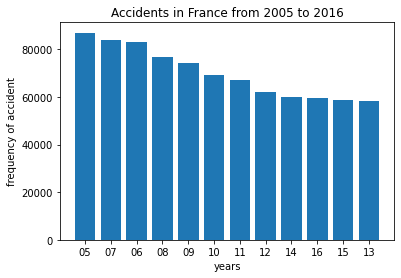

In [49]:
plt.figure(figsize=(6,4))
plt.title("Accidents in France from 2005 to 2016")
plt.xlabel("years")
plt.ylabel("frequency of accident")
plt.bar(year.index, year);

between 2005 and 2016, 2005 recorded the highest number of accident while 2013 recorded the lowest number of accidents in france

In [50]:
illumination = xtics_file["lum"].value_counts(dropna=False)
illumination

1    576861
5    141279
3     65811
2     49140
4      6894
Name: lum, dtype: int64

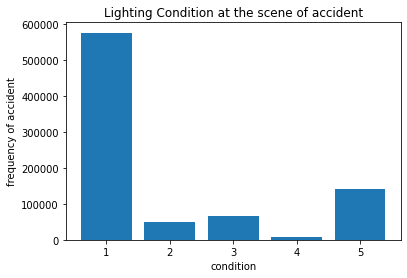

In [51]:
plt.figure(figsize=(6,4))
plt.title("Lighting Condition at the scene of accident")
plt.xlabel("condition")
plt.ylabel("frequency of accident")
plt.bar(illumination.index, illumination);

according to the documentation, 1 represent full day, which means highest number of accident occurs during the full day followed by 5(Night with public lighting on). we cannot according to this graph conclude that accident is more frequent when there is no lighting on the the road

In [ ]:
weather = xtics_file["atm"].value_counts(dropna=False)
weather

In [53]:
#filling Nan values with the most frequent values
xtics_file["atm"] = xtics_file["atm"].fillna(1.0)

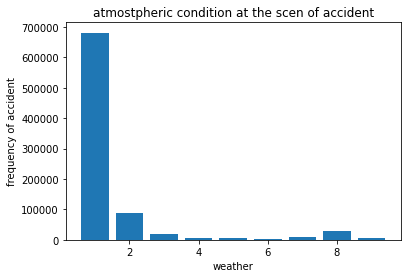

In [54]:
plt.figure(figsize=(6,4))
plt.title("atmostpheric condition at the scen of accident")
plt.xlabel("weather")
plt.ylabel("frequency of accident")
plt.bar(weather.index, weather);

according to the documentation, 1 represent normal atmostphere, which means highest number of accident occurs when the atmostpheric condition is normal followed by 2(light rain). we cannot according to this graph conclude that accident is more frequent when there is bad atmostphere

In [55]:
gradient = xtics_file["prof"].value_counts(dropna=False)
gradient

1.0    634776
2.0    114043
0.0     63894
3.0     15130
4.0     11081
NaN      1061
Name: prof, dtype: int64

In [56]:
xtics_file["prof"] = xtics_file["prof"].fillna(1.0)

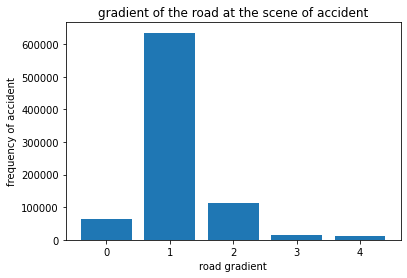

In [57]:
plt.figure(figsize=(6,4))
plt.title("gradient of the road at the scene of accident")
plt.xlabel("road gradient")
plt.ylabel("frequency of accident")
plt.bar(gradient.index, gradient);

according to the documentation, 1 represent dish road, which means highest number of accident occurs when the gradient of the road is dish, which is norma followed by 2(slopy road). we cannot according to this graph conclude that accident is more frequent when the road is not normal

In [58]:
category = xtics_file["catr"].value_counts(dropna=False)
category

4.0    425061
3.0    262690
2.0     67918
1.0     61077
9.0     16084
6.0      5520
5.0      1634
NaN         1
Name: catr, dtype: int64

In [59]:
xtics_file["catr"] = xtics_file["catr"].fillna(4.0)

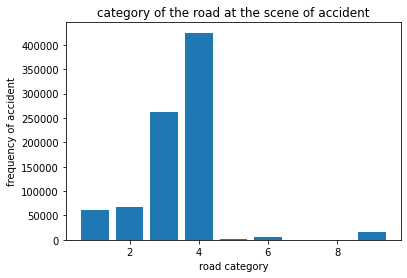

In [60]:
plt.figure(figsize=(6,4))
plt.title("category of the road at the scene of accident")
plt.xlabel("road category")
plt.ylabel("frequency of accident")
plt.bar(category.index, category);

according to the documentation, 4 represent communal road, which means highest number of accident occurs when the category of the road is communal, which is normal followed by 3(departmental road). we cannot according to this graph conclude that accident is more frequent when the road is not good

In [61]:
road_surface = xtics_file["surf"].value_counts(dropna=False)
road_surface

1.0    652322
2.0    143254
0.0     26998
7.0      5474
9.0      4483
5.0      2643
8.0      2159
NaN      1017
3.0       861
6.0       466
4.0       308
Name: surf, dtype: int64

In [62]:
xtics_file["surf"] = xtics_file["surf"].fillna(1.0)

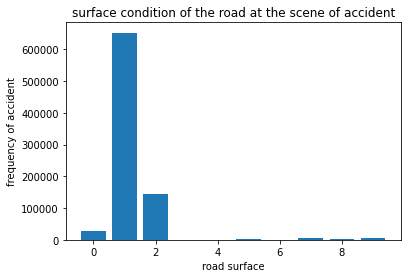

In [63]:
plt.figure(figsize=(6,4))
plt.title("surface condition of the road at the scene of accident")
plt.xlabel("road surface")
plt.ylabel("frequency of accident")
plt.bar(road_surface.index, road_surface);

according to the documentation, 1 represent norma road surface, which means highest number of accident occurs when the surface of the road is normal, followed by 2(wet surface). we cannot according to this graph conclude that accident is more frequent when the road surface is not normal